In [1]:
#load packages
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
import warnings

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

In [2]:
#get data
sentences = pd.read_csv('yelp_labelled.txt', sep = '\t', header=None)
sentences.columns = ['sentence', 'sentiment']

## Model 1

For my original model, I worked with positive words to identify the sentiment of the sentences. Generic words like good and love had the largest impact on performance. The cross-validation scores of this model span a fairly wide range, which might indicate overfitting. This model more often incorrectly identified positive sentences as negative than it identified negative sentences as positive.

In [3]:
#define keywords for model
keywords = ['loved', 'great', 'amazing', 'good', 'like', 'tasty', 'delicious', 'love', 'fantastic', 'best',
           'wonderful', 'nice', 'friendly', 'excellent', 'beautiful', 'incredible', 'liked', 'delish', 'flavorful',
           'unbelievable', 'fun', 'fast', 'generous', 'fresh', 'charming', 'caring', 'satisfying', 'highlight',
           'enjoyed', 'authentic', 'happy', 'awesome', 'pleasure', 'yummy', 'impressed', 'huge', 'fabulous', 
            'options', 'clean', 'cute', 'pleased', 'quick', 'reasonable', '5', 'rare', 'favorite', 'comfortable',
           'promptly', 'tender', 'regular', 'homemade', 'beauty', 'reasonably', 'jewel', 'exquisite']

for key in keywords:
    sentences[str(key)] = sentences.sentence.str.contains(' ' + str(key) + ' '+'|'+ ' ' + str(key) + '.' 
                                                          +'|'+' ' + str(key) + '!'+'|'+ ' '+ str(key) + ',', case=False)

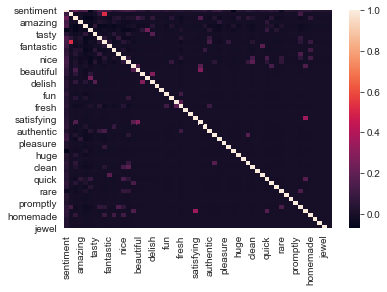

In [4]:
#show correlation between keywords
sns.heatmap(sentences.corr())
plt.show()

In [5]:
#define data and target
data = sentences[keywords]
target = sentences['sentiment']

In [6]:
#fit model
model = BernoulliNB()
model.fit(data, target)
prediction = model.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != prediction).sum()
))

Number of mislabeled points out of a total 1000 points : 224


In [7]:
confusion_matrix(target, prediction)

array([[449,  51],
       [173, 327]], dtype=int64)

In [8]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, data, target, cv=10)

array([0.66, 0.73, 0.78, 0.72, 0.77, 0.69, 0.76, 0.8 , 0.74, 0.81])

## Model 2

For this model, I used negative words to identify the sentiment of the sentences. Words like not and never had the greatest impact on the performance of the model. Overall, this model has slightly better performance with fewer features than the previous model. This model also had a narrower range of cross validation scores, which indicates that overfitting was probably not an issue with this model. This is probably because people were more consistent with the words that they used when negatively describing a restaurant than with the words they used to positively describe one.

In [9]:
sentences2 = sentences[['sentence', 'sentiment']]

In [10]:
#define keywords for model
keywords = ['not', "didn't", 'never', 'worst', 'bad', 'horrible', 'bland', 'poor', 'disappointing', 'gross', 'overpriced',
           'rude', 'slow', "wasn't", 'stale', "don't", 'sad', 'waiting', 'suck', 'zero', 'cold', 'disappointed', 'waited',
           'stinks', 'boring', 'sick', 'avoid', 'mediocre', 'terrible', 'disappointment', 'waste', 'hair', 'off', 
            'disgusting', 'hate', 'ignored', 'mistake', 'dry', "won't", 'dirt', 'flavorless', 'elsewhere', 'awful',
           'tasteless', 'nasty', 'below', 'angry', 'stupid', 'struggle']

for key in keywords:
    sentences2[str(key)] = sentences2.sentence.str.contains(' ' + str(key) + ' '+'|'+ ' ' + str(key) + '.' 
                                                          +'|'+' ' + str(key) + '!'+'|'+ ' '+ str(key) + ',', case=False)

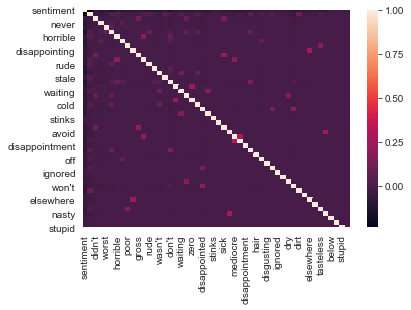

In [11]:
#show correlation between keywords
sns.heatmap(sentences2.corr())
plt.show()

In [12]:
#define data and target
data2 = sentences2[keywords]
target2 = sentences2['sentiment']

In [13]:
#fit model
model2 = BernoulliNB()
model2.fit(data2, target2)
prediction2 = model2.predict(data2)
print('Number of mislabeled points out of a total {} points : {}'.format(
    data2.shape[0],
    (target2 != prediction2).sum()
))

Number of mislabeled points out of a total 1000 points : 213


In [14]:
confusion_matrix(target2, prediction2)

array([[324, 176],
       [ 37, 463]], dtype=int64)

In [15]:
cross_val_score(model2, data2, target2, cv=10)

array([0.77, 0.77, 0.82, 0.74, 0.71, 0.81, 0.81, 0.71, 0.73, 0.79])

## Model 3

For this model, I added features representing whether the review was uppercase and whether the reviews contained an exclamation point. This model did not work as well as the original model, and also had the same issue with potential overfitting as the original model.

In [16]:
sentences3 = sentences[['sentence', 'sentiment']]

In [17]:
#define keywords for model
keywords = ['loved', 'great', 'amazing', 'good', 'like', 'tasty', 'delicious', 'love', 'fantastic', 'best',
           'wonderful', 'nice', 'friendly', 'excellent', 'beautiful', 'incredible', 'liked', 'delish', 'flavorful',
           'unbelievable', 'fun', 'fast', 'generous', 'fresh', 'charming', 'caring', 'satisfying', 'highlight',
           'enjoyed', 'authentic', 'happy', 'awesome', 'pleasure', 'yummy', 'impressed', 'huge', 'fabulous', 
            'options', 'clean', 'cute', 'pleased', 'quick', 'reasonable', '5', 'rare', 'favorite', 'comfortable',
           'promptly', 'tender', 'regular', 'homemade', 'beauty', 'reasonably', 'jewel', 'exquisite']

for key in keywords:
    sentences3[str(key)] = sentences3.sentence.str.contains(' ' + str(key) + ' '+'|'+ ' ' + str(key) + '.' 
                                                          +'|'+' ' + str(key) + '!'+'|'+ ' '+ str(key) + ',', case=False)
sentences3['exclamation'] = sentences3.sentence.str.contains('!')
sentences3['upper'] = sentences3.sentence.str.isupper()

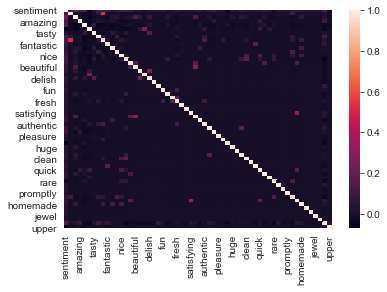

In [18]:
#show correlation between keywords
sns.heatmap(sentences3.corr())
plt.show()

In [19]:
#define data and target
data3 = sentences3[keywords + ['exclamation']]
target3 = sentences3['sentiment']

#fit model
model3 = BernoulliNB()
model3.fit(data3, target3)
prediction3 = model3.predict(data3)
print("Number of mislabeled points out of a total {} points : {}".format(
    data3.shape[0],
    (target3 != prediction3).sum()
))

Number of mislabeled points out of a total 1000 points : 244


In [20]:
confusion_matrix(target3, prediction3)

array([[414,  86],
       [158, 342]], dtype=int64)

In [21]:
cross_val_score(model3, data3, target3, cv=10)

array([0.67, 0.71, 0.76, 0.74, 0.72, 0.65, 0.74, 0.77, 0.69, 0.8 ])

## Model 4

Next, I created a new model similar to the original model. For this model, I went through each row in the dataset and looked for words indicating positive sentiment. This technique eventually led to a model that shared many features with the first model, but were not entirely the same. This model performed similarly to the first model, but also had more consistent cross-validation scores.

In [22]:
sentences4 = sentences[['sentence', 'sentiment']]

In [23]:
#define keywords for model
keywords = ['love', 'great', 'prompt', 'recommended', 'amazing', 'cute', 'beautiful', 'performed', 'good', 'happier',
           'redeeming', 'delight', 'tender', 'tasty', 'huge', 'perfect', 'delicious', 'best', 'quick', 'fantastic',
           'wonderful', 'friendly', 'excellent', 'clean', 'right away', 'diverse', 'modern', 'incredible', 'decor',
           'satisfied', 'delish', 'rich', 'bargain', 'welcome', 'fun', 'flavourful', 'flavorful', 'exquisite', 'fresh',
           'recommend', 'happy', 'in-house', 'unreal', 'nice', 'cool', '5 stars', 'comfortable', 'winner', 'outstanding', 
           'jewel']

for key in keywords:
    sentences4[str(key)] = sentences4.sentence.str.contains(' ' + str(key) + ' '+'|'+ ' ' + str(key) + '.' 
                                                          +'|'+' ' + str(key) + '!'+'|'+ ' '+ str(key) + ',', case=False)

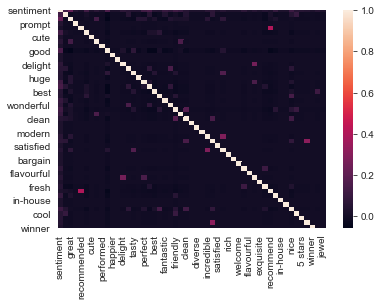

In [24]:
#show correlation between keywords
sns.heatmap(sentences4.corr())
plt.show()

In [25]:
#define data and target
data4 = sentences4[keywords]
target4 = sentences4['sentiment']

#fit model
model4 = BernoulliNB()
model4.fit(data4, target4)
prediction4 = model4.predict(data4)
print('Number of mislabeled points out of a total {} points : {}'.format(
    data4.shape[0],
    (target4 != prediction4).sum()
))

Number of mislabeled points out of a total 1000 points : 231


In [26]:
confusion_matrix(target4, prediction4)

array([[447,  53],
       [178, 322]], dtype=int64)

In [27]:
cross_val_score(model4, data4, target4, cv=10)

array([0.68, 0.73, 0.78, 0.75, 0.76, 0.72, 0.7 , 0.77, 0.69, 0.76])

## Model 5

For the last version of the model, I created a new version of the second model using a similar technique to the one that I used to make the fourth model. This model had very similar performance to the second model. This model had a wide range of values for the cross validation scores, so it is possible that this model overfit to the data.

In [28]:
sentences5 = sentences[['sentence', 'sentiment']]

In [29]:
#define keywords for model
keywords = ['not', 'nasty', 'angry', "didn't", 'disgusted', 'shocked', 'slow', 'blah', 'never', 'poor', 'gross',
           'warm', 'worst', 'final', 'elsewhere', 'stupid', 'suck', 'sick', 'bad', 'horrible', 'excuse', 'mess',
           'meh', 'over', 'appalling', 'wasting', 'underwhelming', 'smelled', 'bland', 'disaster', 'disappointing',
           'least', 'had better', 'bitches', "wouldn't", 'rude', "don't", "wasn't", 'ignore', 'waited', 'stale', 'avoid',
           'sad', 'leaves', 'literally', 'dirt', 'missing', 'blows', 'off', 'waiting', "won't", 'needed', 'uninspired',
           'zero', 'none', "couldn't", 'tough', 'stinks', 'burned', '1 star', 'stay away', 'boring', 'untoasted', 'joke',
           'downside', "shouldn't", 'dropped']

for key in keywords:
    sentences5[str(key)] = sentences5.sentence.str.contains(' ' + str(key) + ' '+'|'+ ' ' + str(key) + '.' 
                                                          +'|'+' ' + str(key) + '!'+'|'+ ' '+ str(key) + ',', case=False)

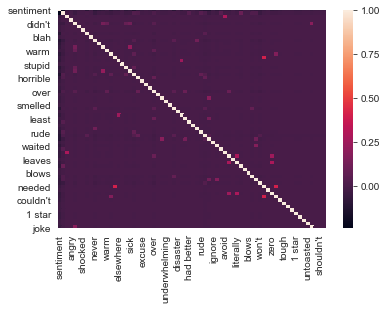

In [30]:
#show correlation between keywords
sns.heatmap(sentences5.corr())
plt.show()

In [31]:
#define data and target
data5 = sentences5[keywords]
target5 = sentences5['sentiment']

#fit model
model5 = BernoulliNB()
model5.fit(data5, target5)
prediction5 = model5.predict(data5)
print('Number of mislabeled points out of a total {} points : {}'.format(
    data5.shape[0],
    (target5 != prediction5).sum()
))

Number of mislabeled points out of a total 1000 points : 215


In [32]:
confusion_matrix(target5, prediction5)

array([[327, 173],
       [ 42, 458]], dtype=int64)

In [33]:
cross_val_score(model5, data5, target5, cv=10)

array([0.84, 0.8 , 0.86, 0.66, 0.67, 0.73, 0.8 , 0.72, 0.71, 0.69])

Overall, the second model performed the best.